In [5]:
import os
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
%matplotlib inline 
from langdetect import detect, detect_langs
import unicodedata
import re


def has_letters(s):
    return any([unicodedata.category(c) in ['Ll','Lu','Lo'] for c in s])

In [8]:
import nltk

In [10]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Hit Enter to continue: d all
  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] hmm_treebank_pos_tagger Treebank Part of Speech Tagger (HMM)
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian.............. Indian Language POS-Tagged Corpus
  [ ] jeita............... JEITA Public Morphologically Tagged Corpus (in
                         

       |   Unzipping corpora/dolch.zip.
       | Downloading package europarl_raw to /home/odor/nltk_data...
       |   Unzipping corpora/europarl_raw.zip.
       | Downloading package floresta to /home/odor/nltk_data...
       |   Unzipping corpora/floresta.zip.
       | Downloading package framenet_v15 to /home/odor/nltk_data...
       |   Unzipping corpora/framenet_v15.zip.
       | Downloading package framenet_v17 to /home/odor/nltk_data...
       |   Unzipping corpora/framenet_v17.zip.
       | Downloading package gazetteers to /home/odor/nltk_data...
       |   Unzipping corpora/gazetteers.zip.
       | Downloading package genesis to /home/odor/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /home/odor/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /home/odor/nltk_data...
       |   Unzipping corpora/ieer.zip.
       | Downloading package inaugural to /home/odor/nltk_data...
       |  

       |   Unzipping help/tagsets.zip.
       | Downloading package snowball_data to /home/odor/nltk_data...
       | Downloading package bllip_wsj_no_aux to
       |     /home/odor/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package word2vec_sample to
       |     /home/odor/nltk_data...
       |   Unzipping models/word2vec_sample.zip.
       | Downloading package panlex_swadesh to /home/odor/nltk_data...
       | Downloading package mte_teip5 to /home/odor/nltk_data...
       |   Unzipping corpora/mte_teip5.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /home/odor/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package perluniprops to /home/odor/nltk_data...
       |   Unzipping misc/perluniprops.zip.
       | Downloading package nonbreaking_prefixes to
       |     /home/odor/nltk_data...
       |   Unzipping corpora/nonbreaking_prefixes.zip.
       | Downloading pack

True

In [12]:
ls ~/nltk_data/corpora/swiss_g/NOAHsCorpusOfSwissGermanDialects_Release2.1

blick.xml  blogs.xml  README.txt  schobinger.xml  swatch.xml  wiki.xml


In [10]:
from nltk.corpus import XMLCorpusReader
blick = XMLCorpusReader("." ,'blogs.xml')
swiss_german_text=" ".join(blick.words()).split(" . ")

In [4]:
swiss_german_text

['Bettwanze und Vire im Gepäck Vorsorg Wer jetzt sini Sommerferie buecht , sött a möglichi unerwünschti Gescht dänke : Epidemie , Wire und Wanze sind im Vormarsch',
 'Villi buechet jetzt Griechäland wäge de günschtige Agebot',
 'Doch Achtung : Uf de Website Savetravel',
 'ch warnt es Expertekomitee vor ere neue Tollwuet - epidemie',
 'Tollwuet wird dur de Speichel vo infizierte Säugetier ( Hünd , Chatze , Nagetier und Flädermüüs ) wiitergäh',
 'Tollwuet isch , wänn nüd rächtzytig behandlet , tödlich',
 'Drum impfe lah',
 'Wer liäber Richtig Asie flügt , söt abkläre , wie s ums neue « Chikungunya Fiäber » staaht',
 'Das wird vor allem us Indonesie , Bali , Java , Sumatra und Singapur gmäldet',
 'In Ostjakarta sind rund 200 Fäll regischtriert wordä',
 'än Impfschtoff gits no keine',
 'Typischi Symptom sind Glänkschmerzä i de Chnü und Chnöchel',
 'Dezue chömet typischi Grippe - symptom wie Temperatur , Kopfweh und Bindehutentzündig',
 'Fans vo Kuba söttet sich vor de Cholera in Acht neeh'

In [11]:
float(sum(list(map(lambda x: translate(x)=='de',swiss_german_text))))/len(swiss_german_text)

0.8270932607215793

In [8]:
def translate(x):
    try:
        t=detect(x)
    except:
        t=np.nan
    return t

In [7]:
translate("Ali Mönsche send frey ond gebore met de glicher Wörde ond de gliche Rächt")

'de'

In [2]:
with open("/dlabdata1/odor/twitter-swisscom/twex.tsv", 'r') as f:
    read_data = f.read()

In [118]:
read_data.count("#CVP")

303

In [12]:
def find_nth_overlapping(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+1)
        n -= 1
        print(haystack[start-100:start+200])
    return start

In [20]:
find_nth_overlapping(read_data, "01f8d411ccaff471", 34)

's try again... (@ Geneva-Cointrin Airport (GVA) w/ 4 others) http://4sq.com/4pTRIN	6.10816	46.2308	01f8d411ccaff471	\N	3	 	46.2363	6.1185	foursquare	http://foursquare.com	Martin Tengelin	martintengelin	155	83	2355	iPhone: 46.202093,6.157792
25482031302	120433	2010-09-25 08:21:08	Eben in der Regenja
n, CH
25667285255	5738252	2010-09-27 07:50:01	merci à tous ! Et vive les vacances !	6.10855	46.2319	01f8d411ccaff471	\N	1	 	46.2363	6.1185	Twitter for iPhone	http://twitter.com/#!/download/iphone	Cédric Aellen	alienlebarge	238	413	5148	Lausanne, Sweetzerland
25667360129	15340234	2010-09-27 07:51:45	
birthday party! (@ Geneva-Cointrin Airport (GVA) w/ 5 others) http://4sq.com/4pTRIN	6.10816	46.2308	01f8d411ccaff471	\N	3	 	46.2363	6.1185	foursquare	http://foursquare.com	Martin Tengelin	martintengelin	155	83	2355	iPhone: 46.202093,6.157792
26100384802	9482442	2010-10-01 17:28:54	Une bonne séance d
t (GVA) (Route de l'Aeroport 21, Grand-Saconnex) w/ 6 others. http://4sq.com/4pTRIN	6.10816	46.23

5420226

In [ ]:
from collections import Counter

words = 

cap_words = [word.upper() for word in words]

word_counts = Counter(cap_words)


In [ ]:
words=

In [3]:
read_data1=read_data.replace("\n"," ").replace("\t"," ").split()

In [5]:
from collections import Counter
#read_data1 = [word.upper() for word in read_data1]
word_counts = Counter(read_data1)

In [10]:
word_counts.most_common(1000)

[('\\N', 31999518),
 ('\x00', 20213916),
 ('Twitter', 15879101),
 ('for', 15371311),
 ('1', 9929882),
 ('iPhone', 9734164),
 ('http://twitter.com/#!/download/iphone', 9716848),
 ('Android', 3980729),
 ('5', 3969977),
 ('http://twitter.com/download/android', 3836398),
 ('de', 2485395),
 ('a', 2104802),
 ('2', 1749459),
 ('46.2048', 1734663),
 ('6.14319', 1731932),
 ('c3a6437e1b1a726d', 1731129),
 ('la', 1674445),
 ('Switzerland', 1655041),
 ('Web', 1651668),
 ('http://twitter.com', 1615285),
 ('Client', 1606231),
 ('18777', 1605175),
 ('web', 1533718),
 ('-', 1300679),
 ('Suisse', 1276021),
 ('je', 1234292),
 ('le', 1138944),
 ('que', 1109446),
 ('in', 1038000),
 ('the', 1034127),
 ('pas', 1028297),
 ('8.53676', 1024586),
 ('47.3774', 1001954),
 ('3acb748d0f1e9265', 1000838),
 ('7', 999321),
 ('me', 929840),
 ('!', 926317),
 ('Instagram', 923453),
 ('http://instagr.am', 912833),
 ('un', 882652),
 ('et', 795200),
 ('en', 784964),
 ('to', 759374),
 ('I', 755680),
 ('\\', 748714),
 ('les',

In [4]:
with open("/dlabdata1/odor/twitter-swisscom/sample2.tsv", 'w') as f:
    f.write(read_data1)

In [5]:
read_data2=list(map(lambda x: x.split("\t"),read_data1))
read_data2=read_data2[0:-1]

In [6]:
tdata=pd.DataFrame(read_data2)

In [7]:
schema=pd.read_csv("twitter-swisscom/schema.txt",sep="\s+",quoting=csv.QUOTE_NONE,header=None)
schema.drop([0,3,4,5],axis=1,inplace=True)
tdata.columns=schema[1]

In [8]:
lang_codes=pd.read_csv("twitter-swisscom/language-codes_csv.csv")
lang_codes.set_index("alpha2",inplace=True)

In [9]:
tdata["text"]=tdata["text"].astype(str)

In [10]:
tdata["text_stripped"]=tdata.text.map(lambda x: re.sub(r'http\S+', '', x))
tdata["text_stripped"]=tdata["text_stripped"].map(lambda x: re.sub(r'#\S+', '', x))
tdata["text_stripped"]=tdata.text_stripped.map(lambda x: re.sub(r'@\S+', '', x))

In [ ]:
#a=[None] * tdata.shape[0]
#b=[None] * tdata.shape[0]
#for row in tdata["text_stripped"].iteritems():
#    try:
#        a[row[0]]=detect(row[1])
#        b[row[0]]=lang_codes.English[a[row[0]]]
#    except:
#        b[row[0]]="Undetected"

In [11]:
def translate(x):
    try:
        t=detect(x)
    except:
        t=np.nan
    return t

tdata["lang"]=tdata.text_stripped.map(lambda x: translate(x))
tdata["language"]=tdata.lang.map(lambda x: lang_codes.English[x] if not pd.isnull(x) else "Undetected")

In [ ]:
pd.to_pickle(tdata,"/dlabdata1/odor/twitter-swisscom/tdata_lang.p")

In [12]:
counts=tdata.groupby("language").id.count().sort_values(ascending=False)
counts=counts.reset_index()
counts.columns=["language","count"]
pd.to_pickle(counts,"/dlabdata1/odor/twitter-swisscom/lang_counts.p")

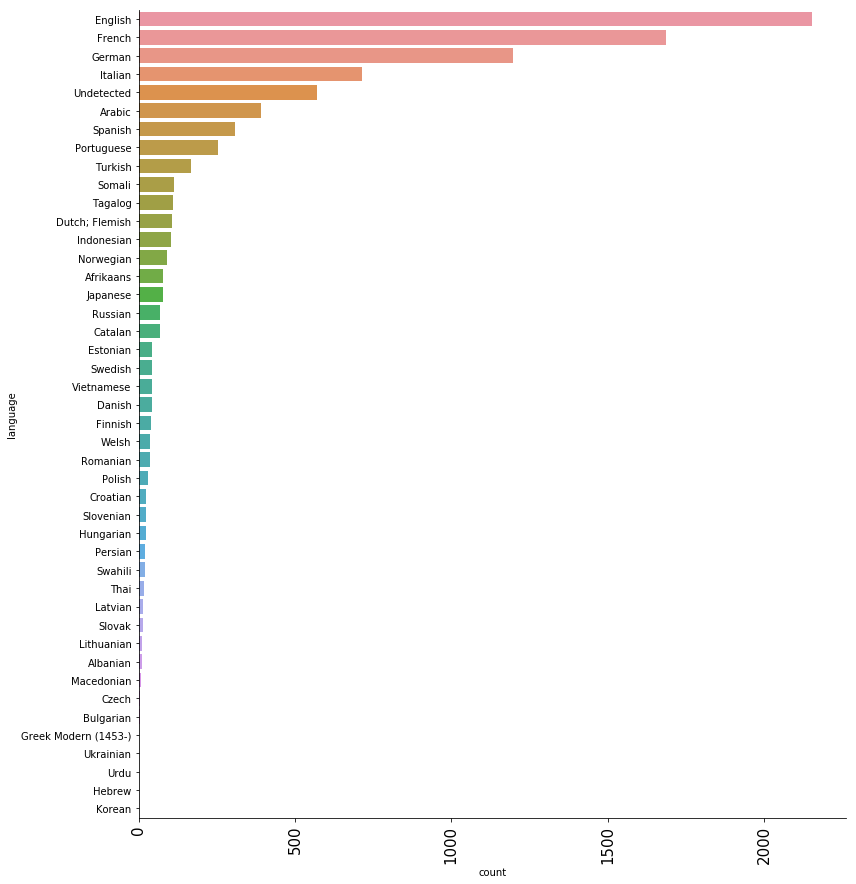

In [13]:
ax = sns.factorplot(size=12,kind = 'bar', y="language", x="count", data=counts, orient='h')
plt.xticks(rotation=90,fontsize=15)
plt.show(ax)

In [17]:
22222184.0/8790.0

2528.1210466439134

In [ ]:
#pd.set_option("display.max_rows",500)
#tdata.loc[tdata.language==""].text_stripped[0:500]

In [3]:
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('swiss-population-data/ch_municipalities.geojson') as f:
    js = json.load(f)

# construct point based on lon/lat returned by geocoder
point = Point( 9.006178,45.818558)

# check each polygon to see if it contains the point
for feature in js['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print('Found containing polygon:', feature)


In [17]:
js["features"][0]['geometry']

{'coordinates': [[[8.507, 47.286],
   [8.511, 47.283],
   [8.511, 47.279],
   [8.509, 47.274],
   [8.504, 47.273],
   [8.501, 47.272],
   [8.502, 47.261],
   [8.501, 47.261],
   [8.486, 47.26],
   [8.483, 47.258],
   [8.474, 47.261],
   [8.472, 47.263],
   [8.477, 47.269],
   [8.472, 47.274],
   [8.472, 47.279],
   [8.473, 47.282],
   [8.477, 47.282],
   [8.471, 47.284],
   [8.477, 47.289],
   [8.484, 47.289],
   [8.485, 47.293],
   [8.493, 47.292],
   [8.501, 47.287],
   [8.507, 47.286]]],
 'type': 'Polygon'}

In [23]:
import folium

ModuleNotFoundError: No module named 'folium'